# K-Nearest Neighbor 1

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


### Load data

In [2]:
df=pd.read_csv("data/bmi.csv")
df

,Height,Weight,BMI
0,150,45,Normal
1,155,70,Overweight
2,145,35,Underweight
3,160,55,Normal
4,140,50,Overweight
5,142,30,Underweight
6,152,65,Overweight
7,157,42,Underweight
8,147,42,Normal
9,150,50,Normal


Note: Height is in centimeters and weight is in kilograms

### Prepare data

In [3]:
df.dtypes

Height     int64
Weight     int64
BMI       object
dtype: object

In [4]:
# Convert BMI to a categorical type
df['BMI'] = df.BMI.astype('category')
df.dtypes

Height       int64
Weight       int64
BMI       category
dtype: object

### Split independent (x) and dependent (y) variables

In [5]:
x=df.iloc[:,0:2]
x.head(3)

,Height,Weight
0,150,45
1,155,70
2,145,35


In [6]:
y=df.iloc[:,2]
y.head(3)

0         Normal
1     Overweight
2    Underweight
Name: BMI, dtype: category
Categories (3, object): ['Normal', 'Overweight', 'Underweight']

### Split into training and test sets

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Train model

In [8]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric="euclidean")
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

### Calculate accuracy score

In [9]:
y_pred=knn.predict(x_test)
print("Accuracy of test set =", accuracy_score(y_test, y_pred)*100)

Accuracy of test set = 83.33333333333334


### Predict for new inputs

In [10]:
knn.predict([[150,61]])

array(['Overweight'], dtype=object)

In [11]:
knn.predict([[155,50]])

array(['Normal'], dtype=object)

In [12]:
knn.predict([[145,25]])

array(['Underweight'], dtype=object)

### Find best k value

In [13]:
# Set up array of possible k values
possible_k=[3,5,7,9,11]

In [14]:
# Calculate accuracy for each k value
ac_scores=[]
for k in possible_k:
    knn=KNeighborsClassifier(n_neighbors=k, weights = 'distance', metric="euclidean")
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores=accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
print ("Accuracy Scores :", ac_scores)

Accuracy Scores : [0.8333333333333334, 1.0, 0.8333333333333334, 0.6666666666666666, 0.8333333333333334]


In [15]:
# Calculate the error
MSE=[1-x for x in ac_scores]
print ("MSE : ", MSE)

MSE :  [0.16666666666666663, 0.0, 0.16666666666666663, 0.33333333333333337, 0.16666666666666663]


In [16]:
i=MSE.index(min(MSE))
best_k=possible_k[i]
print ("Best value of k is ", best_k)

Best value of k is  5


### Plot MSE vs k

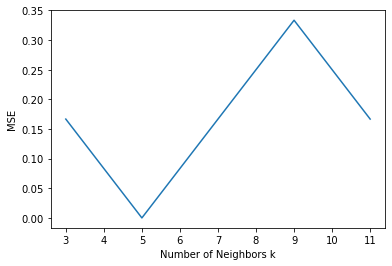

In [17]:
plt.plot(possible_k,MSE)
plt.xlabel("Number of Neighbors k")
plt.ylabel("MSE")
plt.show()